# Image Segmentation From scratch using Pytorch


This is my first hands on with image segmentation and I tried to learn from existing pytorch notebooks.
One thing I imediately noticed is Using High level frameworks like catalyst is very convinient but For
learner like me who came here to learn it is difficult to know what is happening under the hood and
that's what we are here for,that is what we want to learn. so I wrote this kernel.
### It does all things from scartch so we can see what's happening 

## Features of this kernel 
* Using vanila Unet Architecture
* Deterministic behaviour for reproducability
* K-fold cross validation is already Implemented (i.e. data spliting is done)
* loss function is also implmented for clearity
* Training loop is open to see exactly what is happening
* Processing output by removing mask that occur on black part of input image
* Drawing convex hull before optimizing thresholds
...

## Unet architecture
![Unet](https://urldefense.proofpoint.com/v2/url?u=https-3A__lmb.informatik.uni-2Dfreiburg.de_people_ronneber_u-2Dnet_u-2Dnet-2Darchitecture.png&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=qY4yBv9PtYU73fIow_GCiLg1MbJrzj1sDiMln6mrAMs&e= )

Finally Huge thanks to **artgor, ryches, ratthachat, [repo1](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_qubvel_segmentation-5Fmodels.pytorch_blob_master_segmentation-5Fmodels-5Fpytorch_utils_losses.py&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=x_pEyKCoYHzAAEMFu_ih2K2Uu-BPOIaRckEI_knNhyk&e= ) ,[repo2](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_milesial_Pytorch-2DUNet&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=1D1dP1BEs7OvREI6WlcSTjNsvEjHFRL0Rpc3G_mm5BE&e= ) ** for their code

### **references**
1. https://urldefense.proofpoint.com/v2/url?u=https-3A__www.kaggle.com_artgor_segmentation-2Din-2Dpytorch-2Dusing-2Dconvenient-2Dtools-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=JTdCUTEKoYFqTo2DkcQ-7uNs5Jv2yMC5cDJATf2IVtI&e= 2. https://urldefense.proofpoint.com/v2/url?u=https-3A__www.kaggle.com_ryches_turbo-2Dcharging-2Dandrew-2Ds-2Dpytorch-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=CQc33Y_DQbCIOJUuLSGlhTp6MEqJkuU_Z_YBKE9-pqs&e= 3. https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_qubvel_segmentation-5Fmodels.pytorch_blob_master_segmentation-5Fmodels-5Fpytorch_utils_losses.py-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=_dfNoIKgn2N1MPexH5LJFmRXgHljZ1Nkjaxz6u-mku0&e= 4. https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_milesial_Pytorch-2DUNet-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=j2gtYaQYBAmhyNyp42Pfx8PtOYqzqPPUsaFd87y4Z4A&e= 5. https://urldefense.proofpoint.com/v2/url?u=https-3A__www.kaggle.com_ratthachat_cloud-2Dconvexhull-2Dpolygon-2Dpostprocessing-2Dno-2Dgpu&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=rE8w5XU_CDQDSvWZOqqXalAlKoyffJRHqEUMwkknaTk&e= 

In [1]:
# !pip install albumentations

# Imports

In [2]:
import os
import gc
import cv2
import time
import tqdm
import random
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt
from tqdm.auto import tqdm as tq
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import glob

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

# ablumentations for easy image augmentation for input as well as output
import albumentations as albu
# from albumentations import torch as AT
plt.style.use('bmh')

In [3]:

# seeding function for reproducibility
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


def resize_it(x):
    if x.shape != (350, 525):
        x = cv2.resize(x, dsize=(525, 350), interpolation=cv2.INTER_LINEAR)
    return x


# Dataset class
class CloudDataset(Dataset):
    def __init__(
        self,
        df: pd.DataFrame = None,
        datatype: str = "train",
        img_ids: np.array = None,
        transforms=albu.Compose([albu.HorizontalFlip()]), #, AT.ToTensor()
    ):
        self.df = df
        if datatype != "test":
            self.data_folder = f"{img_paths}/train_images_525/train_images_525"
        else:
            self.data_folder = f"{img_paths}/test_images_525/test_images_525"
        self.img_ids = img_ids
        self.transforms = transforms

    def __getitem__(self, idx):
        image_name = self.img_ids[idx]
        mask = make_mask(self.df, image_name)
        image_path = os.path.join(self.data_folder, image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        augmented = self.transforms(image=img, mask=mask)
        img = np.transpose(augmented["image"], [2, 0, 1])
        mask = np.transpose(augmented["mask"], [2, 0, 1])
        return img, mask

    def __len__(self):
        return len(self.img_ids)


# Helper functions

In [4]:

# helper functions
class_names = ['Fish', 'Flower', 'Sugar', 'Gravel']

def draw_convex_hull(mask, mode='convex'):
    
    img = np.zeros(mask.shape)
    contours, hier = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        if mode=='rect': # simple rectangle
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), -1)
        if mode=='convex': # minimum convex hull
            hull = cv2.convexHull(c)
            cv2.drawContours(img, [hull], 0, (255, 255, 255),-1)
        else: # minimum area rectangle
            rect = cv2.minAreaRect(c)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img, [box], 0, (255, 255, 255),-1)
    return img/255.


In [5]:
def get_img(x, folder: str = "train_images_525/train_images_525"):
    """
    Return image based on image name and folder.
    """
    data_folder = f"{img_paths}/{folder}"
    image_path = os.path.join(data_folder, x)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def rle_decode(mask_rle: str = "", shape: tuple = (1400, 2100)):
    """
    Decode rle encoded mask.

    :param mask_rle: run-length as string formatted (start length)
    :param shape: (height, width) of array to return
    Returns numpy array, 1 - mask, 0 - background
    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order="F")


def make_mask(df: pd.DataFrame, image_name: str = "img.jpg", shape: tuple = (350, 525)):
    """
    Create mask based on df, image name and shape.
    """
    masks = np.zeros((shape[0], shape[1], 4), dtype=np.float32)
    df = df[df["im_id"] == image_name]
    for idx, im_name in enumerate(df["im_id"].values):
        for classidx, classid in enumerate(["Fish", "Flower", "Gravel", "Sugar"]):
            mask = cv2.imread(
                "../input/understanding-clouds-resized/train_masks_525/train_masks_525/"
                + classid
                + im_name
            )
            if mask is None:
                continue
            if mask[:, :, 0].shape != (350, 525):
                mask = cv2.resize(mask, (525, 350))
            masks[:, :, classidx] = mask[:, :, 0]
    masks = masks / 255
    return masks


def to_tensor(x, **kwargs):
    """
    Convert image or mask.
    """
    return x.transpose(2, 0, 1).astype("float32")


def mask2rle(img):
    """
    Convert mask to rle.
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    """
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(str(x) for x in runs)


def visualize(image, mask, original_image=None, original_mask=None):
    """
    Plot image and masks.
    If two pairs of images and masks are passes, show both.
    """
    fontsize = 14
    class_dict = {0: "Fish", 1: "Flower", 2: "Gravel", 3: "Sugar"}

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 5, figsize=(24, 24))

        ax[0].imshow(image)
        for i in range(4):
            ax[i + 1].imshow(mask[:, :, i])
            ax[i + 1].set_title(f"Mask {class_dict[i]}", fontsize=fontsize)
    else:
        f, ax = plt.subplots(2, 5, figsize=(24, 12))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title("Original image", fontsize=fontsize)

        for i in range(4):
            ax[0, i + 1].imshow(original_mask[:, :, i])
            ax[0, i + 1].set_title(f"Original mask {class_dict[i]}", fontsize=fontsize)

        ax[1, 0].imshow(image)
        ax[1, 0].set_title("Transformed image", fontsize=fontsize)

        for i in range(4):
            ax[1, i + 1].imshow(mask[:, :, i])
            ax[1, i + 1].set_title(
                f"Transformed mask {class_dict[i]}", fontsize=fontsize
            )


def visualize_with_raw(
    image, mask, original_image=None, original_mask=None, raw_image=None, raw_mask=None
):
    """
    Plot image and masks.
    If two pairs of images and masks are passes, show both.
    """
    fontsize = 14
    class_dict = {0: "Fish", 1: "Flower", 2: "Gravel", 3: "Sugar"}

    f, ax = plt.subplots(3, 5, figsize=(24, 12))

    ax[0, 0].imshow(original_image)
    ax[0, 0].set_title("Original image", fontsize=fontsize)

    for i in range(4):
        ax[0, i + 1].imshow(original_mask[:, :, i])
        ax[0, i + 1].set_title(f"Original mask {class_dict[i]}", fontsize=fontsize)

    ax[1, 0].imshow(raw_image)
    ax[1, 0].set_title("Original image", fontsize=fontsize)

    for i in range(4):
        ax[1, i + 1].imshow(raw_mask[:, :, i])
        ax[1, i + 1].set_title(f"Raw predicted mask {class_dict[i]}", fontsize=fontsize)

    ax[2, 0].imshow(image)
    ax[2, 0].set_title("Transformed image", fontsize=fontsize)

    for i in range(4):
        ax[2, i + 1].imshow(mask[:, :, i])
        ax[2, i + 1].set_title(
            f"Predicted mask with processing {class_dict[i]}", fontsize=fontsize
        )


def plot_with_augmentation(image, mask, augment):
    """
    Wrapper for `visualize` function.
    """
    augmented = augment(image=image, mask=mask)
    image_flipped = augmented["image"]
    mask_flipped = augmented["mask"]
    visualize(image_flipped, mask_flipped, original_image=image, original_mask=mask)


# sigmoid = lambda x: 1 / (1 + np.exp(-x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



def post_process(probability, threshold, min_size):
    """
    This is slightly different from other kernels as we draw convex hull here itself.
    Post processing of each predicted mask, components with lesser number of pixels
    than `min_size` are ignored
    """
    # don't remember where I saw it
    mask = (cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1])
    mask = draw_convex_hull(mask.astype(np.uint8))
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros((350, 525), np.float32)
    num = 0
    for c in range(1, num_component):
        p = component == c
        if p.sum() > min_size:
            predictions[p] = 1
            num += 1
    return predictions, num

def get_training_augmentation():
    train_transform = [
        albu.HorizontalFlip(p=0.5),
        albu.ShiftScaleRotate(
            scale_limit=0.5,
            rotate_limit=0,
            shift_limit=0.1,
            p=0.5,
            border_mode=0
        ),
        albu.GridDistortion(p=0.5),
        albu.Resize(320, 640),
        albu.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.Resize(320, 640),
        albu.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
    return albu.Compose(test_transform)


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)


def dice(img1, img2):
    img1 = np.asarray(img1).astype(np.bool)
    img2 = np.asarray(img2).astype(np.bool)

    intersection = np.logical_and(img1, img2)

    return 2.0 * intersection.sum() / (img1.sum() + img2.sum())

def dice_no_threshold(
    outputs: torch.Tensor,
    targets: torch.Tensor,
    eps: float = 1e-7,
    threshold: float = None,
):
    """
    Reference:
    https://urldefense.proofpoint.com/v2/url?u=https-3A__catalyst-2Dteam.github.io_catalyst_-5Fmodules_catalyst_dl_utils_criterion_dice.html-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=DinN_cu-Eh-Myq-zn3SrRA&m=6NoejwaTmspiWtNW3QpXumsHW-Zms9ml1sFfXDUxNsd-xnjJwa0RZePhB7YAbjRR&s=0wK3RCgUzfSXdUi6QP6kHnFtKsrKh2EmrptRMmGjS6Q&e=     """
    if threshold is not None:
        outputs = (outputs > threshold).float()

    intersection = torch.sum(targets * outputs)
    union = torch.sum(targets) + torch.sum(outputs)
    dice = 2 * intersection / (union + eps)

    return dice

In [6]:
# import torchvision.datasets as dset
# import torchvision.utils as vutils

# dataroot = "BlenderGeneration/train"

# image_size = 64

# # We can use an image folder dataset the way we have it setup.
# # Create the dataset
# dataset = dset.ImageFolder(root=dataroot,
#                            transform=transforms.Compose([
#                                transforms.Resize(image_size),
#                                transforms.CenterCrop(image_size),
#                                transforms.ToTensor(),
# #                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                            ]))
    
# dataset

In [7]:
# import torch.utils.data as data

# myTransform = transforms.Compose([
#                                 transforms.Resize(image_size),
# #                                 transforms.CenterCrop(image_size),
#                                 transforms.ToTensor()
# #                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                            ])

# class DataLoaderSegmentation(data.Dataset):
#     def __init__(self, folder_path):
#         super(DataLoaderSegmentation, self).__init__()
#         self.len = len(glob.glob(os.path.join(folder_path,"seg","*")))
#         self.folder_path = folder_path
#     def __getitem__(self, index):
#             img_path = [name for name in glob.glob(os.path.join(self.folder_path,"image","*"))  if (int(name.split('/')[-1].split('.')[0]) == index)][0]
#             mask_path = [name for name in glob.glob(os.path.join(self.folder_path,"seg","*"))  if (int(name.split('/')[-1].split('.')[0]) == index)][0]
#             data = myTransform(Image.open(img_path))
#             label = myTransform(Image.open(mask_path))
#             return data, label
        
#     def __len__(self):
#         return self.len

In [8]:
import torch.utils.data as data

image_size = 100
batchsize = 24


myTransform = transforms.Compose([
                                transforms.Resize(image_size),
                                transforms.CenterCrop(image_size),
                                transforms.ToTensor(),
                                
#                                 transforms.Normalize(1, .333 )
                           ])

class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path):
        super(DataLoaderSegmentation, self).__init__()
        self.folder_path = folder_path
    def __getitem__(self, index):
#             print("in get item function")
            img_path = "{}/{}.JPG".format(self.folder_path, index)
            mask_path = "{}/{}.npy".format(self.folder_path, index)
            data = myTransform(Image.open(img_path))
#             plt.imshow(np.transpose(data.cpu(),(1,2,0)))
#             plt.show()
            label = torch.stack([myTransform(Image.fromarray(np.load(mask_path)[i]))[0] for i in range(3)])
#             print(data.size())
#             print(label.size())
            for i in range(3):
                data[i,:,:] = torch.transpose(torch.clone(data[i,:,:]), 0, 1)
                data[i,:,:] = torch.flip(torch.clone(data[i,:,:]),[1])
            return data , label
        
    def __len__(self):
        return np.load("{}/len.npy".format(self.folder_path))

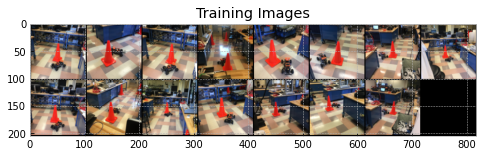

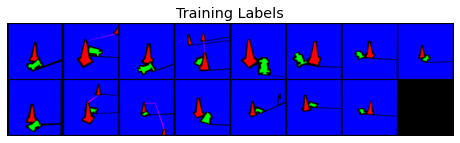

In [9]:
import torchvision.utils as vutils

batch_size = 15
dataset = torch.utils.data.DataLoader(DataLoaderSegmentation('data2'), batch_size=batchsize,shuffle=True)
train_indexer = (len(dataset.batch_sampler)*8)//10
test_indexer = (len(dataset.batch_sampler)-train_indexer)//2
train_loader = DataLoader(DataLoaderSegmentation("data2"), batch_sampler= list(dataset.batch_sampler)[:train_indexer])
test_loader = DataLoader(DataLoaderSegmentation("data2"), batch_sampler= list(dataset.batch_sampler)[train_indexer:-test_indexer])
valid_loader = DataLoader(DataLoaderSegmentation("data2"), batch_sampler= list(dataset.batch_sampler)[-test_indexer:])



workers =  2
ngpu = 0

# Plot some training images
images, labels = next(iter(dataset))

# print(real_batch)
plt.figure(figsize=(8,8))
# plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(images, padding=2, normalize=True).cpu(),(1,2,0)))

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Labels")
plt.imshow(np.transpose(vutils.make_grid(labels, padding=2, normalize=True).cpu(),(1,2,0)))

In [10]:
images.shape, labels.shape

(torch.Size([15, 3, 100, 100]), torch.Size([15, 3, 100, 100]))

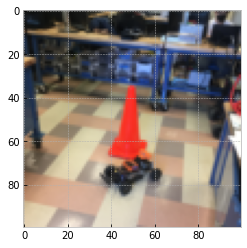

In [11]:
plt.imshow(np.transpose(images[0], (1,2,0)))

In [12]:
np.min(np.array(images[0]))

0.03137255

In [13]:
# bar = tq(train_loader, postfix={"valid_loss":0.0, "dice_score":0.0})
# for data, target in bar:
#     print(data.shape,target.shape)

In [14]:
# path = "BlenderGeneration"
# img_paths = "BlenderGeneration"
train_on_gpu = torch.cuda.is_available()
SEED = 42
MODEL_NO = 0 # in K-fold
N_FOLDS = 10 # in K-fold
# seed_everything(SEED)
# os.listdir(path)

## Make split in train test validation

In [15]:
# train = pd.read_csv(f"{path}/train.csv")
# train["label"] = train["Image_Label"].apply(lambda x: x.split("_")[1])
# train["im_id"] = train["Image_Label"].apply(lambda x: x.split("_")[0])

# sub = pd.read_csv(f"{path}/sample_submission.csv")
# sub["label"] = sub["Image_Label"].apply(lambda x: x.split("_")[1])
# sub["im_id"] = sub["Image_Label"].apply(lambda x: x.split("_")[0])

# # split data
# id_mask_count = (
#     train.loc[train["EncodedPixels"].isnull() == False, "Image_Label"]
#     .apply(lambda x: x.split("_")[0])
#     .value_counts()
#     .sort_index()
#     .reset_index()
#     .rename(columns={"index": "img_id", "Image_Label": "count"})
# )
# ids = id_mask_count["img_id"].values
# li = [
#     [train_index, test_index]
#     for train_index, test_index in StratifiedKFold(
#         n_splits=N_FOLDS, random_state=SEED
#     ).split(ids, id_mask_count["count"])
# ]
# train_ids, valid_ids = ids[li[MODEL_NO][0]], ids[li[MODEL_NO][1]]
# test_ids = sub["Image_Label"].apply(lambda x: x.split("_")[0]).drop_duplicates().values

# print(f"training set   {train_ids[:5]}.. with length {len(train_ids)}")
# print(f"validation set {valid_ids[:5]}.. with length {len(valid_ids)}")
# print(f"testing set    {test_ids[:5]}.. with length {len(test_ids)}")

In [16]:
# # define dataset and dataloader
# num_workers = 2
# bs = 8
# train_dataset = CloudDataset(
#     df=train,
#     datatype="train",
#     img_ids=train_ids,
#     transforms=get_training_augmentation(),
# )
# valid_dataset = CloudDataset(
#     df=train,
#     datatype="valid",
#     img_ids=valid_ids,
#     transforms=get_validation_augmentation(),
# )

# train_loader = DataLoader(
#     train_dataset, batch_size=bs, shuffle=True, num_workers=num_workers
# )
# valid_loader = DataLoader(
#     valid_dataset, batch_size=bs, shuffle=False, num_workers=num_workers
# )

## Model Definition

In [17]:
class double_conv(nn.Module):
    """(conv => BN => ReLU) * 2"""

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(nn.MaxPool2d(2), double_conv(in_ch, out_ch))

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2))
        
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256, False)
        self.up2 = up(512, 128, False)
        self.up3 = up(256, 64, False)
        self.up4 = up(128, 64, False)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return torch.sigmoid(x)

In [18]:
model = UNet(n_channels=3, n_classes=3).float()
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    model.cuda()

In [19]:
model # print Model

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

## Loss function definition

In [20]:
def f_score(pr, gt, beta=1, eps=1e-7, threshold=None, activation='sigmoid'):
    """
    Args:
        pr (torch.Tensor): A list of predicted elements
        gt (torch.Tensor):  A list of elements that are to be predicted
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: IoU (Jaccard) score
    """

    if activation is None or activation == "none":
        activation_fn = lambda x: x
    elif activation == "sigmoid":
        activation_fn = torch.nn.Sigmoid()
    elif activation == "softmax2d":
        activation_fn = torch.nn.Softmax2d()
    else:
        raise NotImplementedError(
            "Activation implemented for sigmoid and softmax2d"
        )

    pr = activation_fn(pr)

    if threshold is not None:
        pr = (pr > threshold).float()


    tp = torch.sum(gt * pr)
    fp = torch.sum(pr) - tp
    fn = torch.sum(gt) - tp

    score = ((1 + beta ** 2) * tp + eps) \
            / ((1 + beta ** 2) * tp + beta ** 2 * fn + fp + eps)

    return score


class DiceLoss(nn.Module):
    __name__ = 'dice_loss'

    def __init__(self, eps=1e-7, activation='sigmoid'):
        super().__init__()
        self.activation = activation
        self.eps = eps

    def forward(self, y_pr, y_gt):
        return 1 - f_score(y_pr, y_gt, beta=1., 
                           eps=self.eps, threshold=None, 
                           activation=self.activation)


class BCEDiceLoss(DiceLoss):
    __name__ = 'bce_dice_loss'

    def __init__(self, eps=1e-7, activation='sigmoid', lambda_dice=1.0, lambda_bce=1.0):
        super().__init__(eps, activation)
        if activation == None:
            self.bce = nn.BCELoss(reduction='mean')
        else:
            self.bce = nn.BCEWithLogitsLoss(reduction='mean')
        self.lambda_dice=lambda_dice
        self.lambda_bce=lambda_bce

    def forward(self, y_pr, y_gt):
        dice = super().forward(y_pr, y_gt)
        bce = self.bce(y_pr, y_gt)
        return (self.lambda_dice*dice) + (self.lambda_bce* bce)

## RAdam Optimizer

In [21]:
import math
import torch
from torch.optim.optimizer import Optimizer, required

class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
            
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        self.buffer = [[None, None, None] for ind in range(10)]
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = self.buffer[int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma

                    # more conservative since it's an approximated value
                    if N_sma >= 5:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    buffered[2] = step_size

                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)

                # more conservative since it's an approximated value
                if N_sma >= 5:            
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                else:
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)

                p.data.copy_(p_data_fp32)

        return loss

In [22]:
criterion = BCEDiceLoss(eps=1.0, activation=None)
optimizer = RAdam(model.parameters(), lr = 0.005)
current_lr = [param_group['lr'] for param_group in optimizer.param_groups][0]
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2, patience=2, cooldown=2)

## Training loop

In [23]:
# number of epochs to train the model
n_epochs = 32
train_loss_list = []
valid_loss_list = []
dice_score_list = []
lr_rate_list = []
valid_loss_min = np.Inf # track change in validation loss
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    dice_score = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    bar = tq(train_loader, postfix={"train_loss":0.0})
    for data, target in bar:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #print(loss)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        bar.set_postfix(ordered_dict={"train_loss":loss.item()})
    ######################    
    # validate the model #
    ######################
    model.eval()
#     del data, target
    with torch.no_grad():
        bar = tq(valid_loader, postfix={"valid_loss":0.0, "dice_score":0.0})
        for data, target in bar:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            dice_cof = dice_no_threshold(output.cpu(), target.cpu()).item()
            dice_score +=  dice_cof * data.size(0)
            bar.set_postfix(ordered_dict={"valid_loss":loss.item(), "dice_score":dice_cof})
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    dice_score = dice_score/len(valid_loader.dataset)
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    dice_score_list.append(dice_score)
    lr_rate_list.append([param_group['lr'] for param_group in optimizer.param_groups])
    
    # print training/validation statistics 
    print('Epoch: {}  Training Loss: {:.6f}  Validation Loss: {:.6f} Dice Score: {:.6f}'.format(
        epoch, train_loss, valid_loss, dice_score))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
    
    scheduler.step(valid_loss)

0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 1  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (inf --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 2  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 3  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 4  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 5  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 6  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 7  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 8  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 9  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 10  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 11  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 12  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 13  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 14  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 15  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 16  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 17  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 18  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 19  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 20  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 21  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 22  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 23  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 24  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 25  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 26  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 27  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 28  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 29  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 30  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 31  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


0it [00:00, ?it/s, train_loss=0]

  0%|          | 0/1 [00:00<?, ?it/s, dice_score=0, valid_loss=0]

Epoch: 32  Training Loss: 0.000000  Validation Loss: 1.355982 Dice Score: 0.366346
Validation loss decreased (1.355982 --> 1.355982).  Saving model ...


In [29]:
torch.save(model.state_dict(), "model.pth")
model = UNet(n_channels=3, n_classes=3).float()
model.load_state_dict(torch.load("model.pth"))
model.cuda()

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

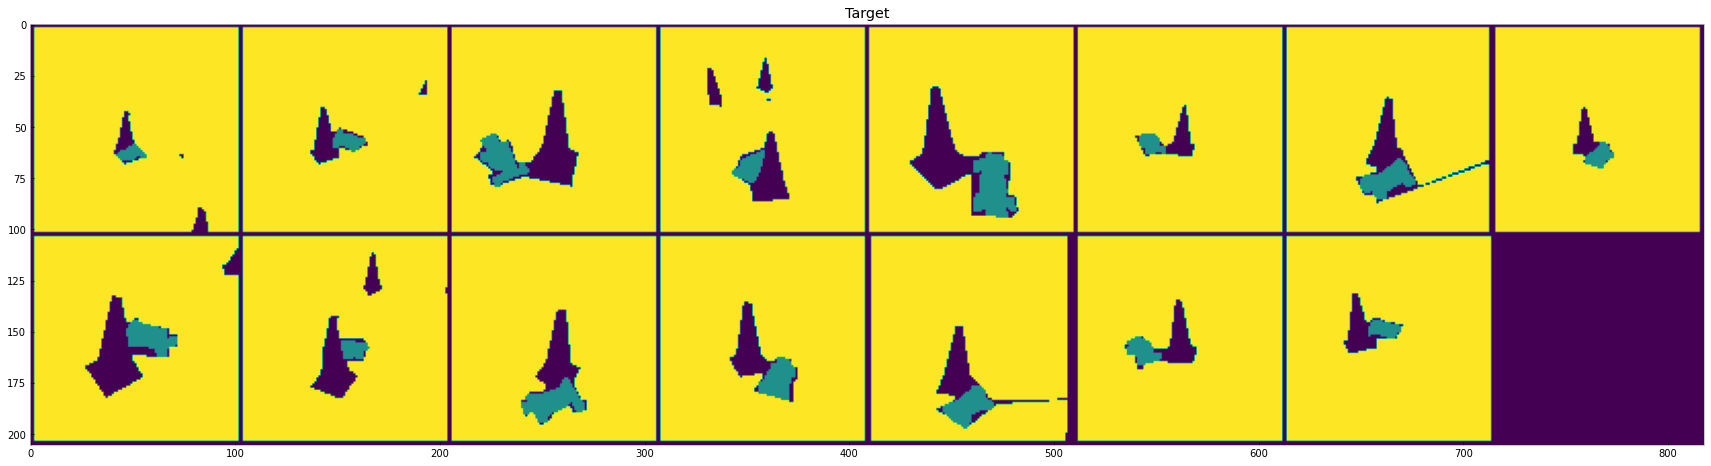

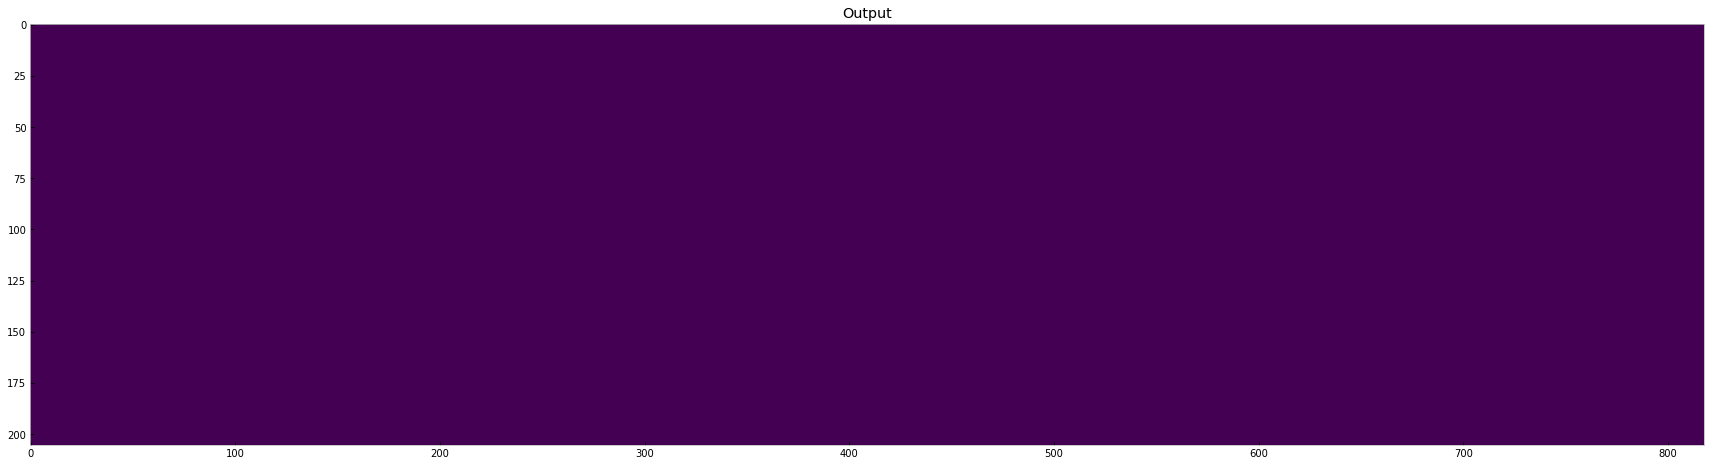

In [30]:
plt.figure(figsize=[30,30])
plt.title("Target")
plt.grid(False)
plt.imshow(np.argmax(vutils.make_grid(target).cpu(), axis = 0))
plt.figure(figsize=[30,30])
plt.grid(False)
plt.title("Output")
plt.imshow(np.argmax(vutils.make_grid(output).cpu(), axis = 0))
# plt.imshow(vutils.make_grid(output).cpu()[1])

 load model param dict

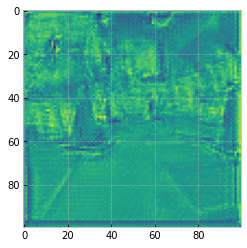

In [34]:
image_size2 = 100

myTransform2 = transforms.Compose([
                                transforms.Resize(image_size2),
                                transforms.CenterCrop(image_size2),
                                transforms.ToTensor(),
#                                 transforms.Normalize(.5,.333)
                           ])

testImage = myTransform2(Image.open("image3.jpg"))
# plt.imshow(np.argmax(model(testImage.reshape(1,3,image_size,image_size).cuda()).cpu().detach()[0], axis = 0))
plt.imshow(model(testImage.reshape(1,3,image_size2,image_size2).cuda()).cpu().detach()[0][0])

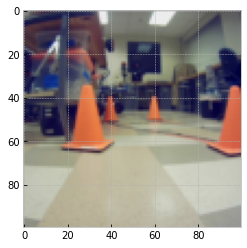

In [35]:
# plt.imshow(np.transpose(testImage,(1,2,0)))
plt.imshow(np.transpose(testImage,(1,2,0)))

In [ ]:
myTransform(Image.open("tester1.jpg")).shape

## Ploting Metrics

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in lr_rate_list])
plt.ylabel('learing rate during training', fontsize=22)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_loss_list,  marker='o', label="Training Loss")
plt.plot(valid_loss_list,  marker='o', label="Validation Loss")
plt.ylabel('loss', fontsize=22)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(dice_score_list)
plt.ylabel('Dice score')
plt.show()

In [ ]:
# load best model
model.load_state_dict(torch.load('model_cifar.pt'))
model.eval();

In [ ]:
valid_masks = []
count = 0
tr = min(len(valid_ids)*4, 2000)
probabilities = np.zeros((tr, 350, 525), dtype = np.float32)
for data, target in tq(valid_loader):
    if train_on_gpu:
        data = data.cuda()
    target = target.cpu().detach().numpy()
    outpu = model(data).cpu().detach().numpy()
    for p in range(data.shape[0]):
        output, mask = outpu[p], target[p]
        for m in mask:
            valid_masks.append(resize_it(m))
        for probability in output:
            probabilities[count, :, :] = resize_it(probability)
            count += 1
        if count >= tr - 1:
            break
    if count >= tr - 1:
        break

## Grid Search for best Threshold

In [ ]:
class_params = {}
for class_id in range(4):
    print(class_id)
    attempts = []
    for t in range(0, 100, 5):
        t /= 100
        for ms in [0, 100, 1200, 5000, 10000, 30000]:
            masks, d = [], []
            for i in range(class_id, len(probabilities), 4):
                probability = probabilities[i]
                predict, num_predict = post_process(probability, t, ms)
                masks.append(predict)
            for i, j in zip(masks, valid_masks[class_id::4]):
                if (i.sum() == 0) & (j.sum() == 0):
                    d.append(1)
                else:
                    d.append(dice(i, j))
            attempts.append((t, ms, np.mean(d)))

    attempts_df = pd.DataFrame(attempts, columns=['threshold', 'size', 'dice'])
    attempts_df = attempts_df.sort_values('dice', ascending=False)
    print(attempts_df.head())
    best_threshold = attempts_df['threshold'].values[0]
    best_size = attempts_df['size'].values[0]
    class_params[class_id] = (best_threshold, best_size)

In [ ]:
del masks
del valid_masks
del probabilities
gc.collect()

In [ ]:
attempts_df = pd.DataFrame(attempts, columns=['threshold', 'size', 'dice'])
print(class_params)

In [ ]:
attempts_df.groupby(['threshold'])['dice'].max()

In [ ]:
attempts_df.groupby(['size'])['dice'].max()

In [ ]:
attempts_df = attempts_df.sort_values('dice', ascending=False)
attempts_df.head(10)

In [ ]:
sns.lineplot(x='threshold', y='dice', hue='size', data=attempts_df);
plt.title('Threshold and min size vs dice');

In [ ]:
best_threshold = attempts_df['threshold'].values[0]
best_size = attempts_df['size'].values[0]

In [ ]:
for i, (data, target) in enumerate(valid_loader):
    if train_on_gpu:
        data = data.cuda()
    output = ((model(data))[0]).cpu().detach().numpy()
    image  = data[0].cpu().detach().numpy()
    mask   = target[0].cpu().detach().numpy()
    output = output.transpose(1 ,2, 0)
    image_vis = image.transpose(1, 2, 0)
    mask = mask.astype('uint8').transpose(1, 2, 0)
    pr_mask = np.zeros((350, 525, 4))
    for j in range(4):
        probability = resize_it(output[:, :, j])
        pr_mask[:, :, j], _ = post_process(probability,
                                           class_params[j][0],
                                           class_params[j][1])
    visualize_with_raw(image=image_vis, mask=pr_mask,
                      original_image=image_vis, original_mask=mask,
                      raw_image=image_vis, raw_mask=output)
    if i >= 6:
        break

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [ ]:
test_dataset = CloudDataset(df=sub,
                            datatype='test', 
                            img_ids=test_ids,
                            transforms=get_validation_augmentation())
test_loader = DataLoader(test_dataset, batch_size=4,
                         shuffle=False, num_workers=2)

In [ ]:
del train_dataset, train_loader
del valid_dataset, valid_loader
gc.collect()

## Prepare Submission

In [ ]:
subm = pd.read_csv("../input/understanding_cloud_organization/sample_submission.csv")
pathlist = ["../input/understanding_cloud_organization/test_images/" + i.split("_")[0] for i in subm['Image_Label']]

In [ ]:
def get_black_mask(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (525,350))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 0], np.uint8)
    upper = np.array([180, 255, 10], np.uint8)
    return (~ (cv2.inRange(hsv, lower, upper) > 250)).astype(int)

plt.imshow(get_black_mask(pathlist[120]))
plt.show()

In [ ]:
encoded_pixels = []
image_id = 0
cou = 0
np_saved = 0
for data, target in tq(test_loader):
    if train_on_gpu:
        data = data.cuda()
    output = model(data)
    del data
    for i, batch in enumerate(output):
        for probability in batch:
            probability = resize_it(probability.cpu().detach().numpy())
            predict, num_predict = post_process(probability,
                                                class_params[image_id % 4][0],
                                                class_params[image_id % 4][1])
            if num_predict == 0:
                encoded_pixels.append('')
            else:
                black_mask = get_black_mask(pathlist[cou])
                np_saved += np.sum(predict)
                predict = np.multiply(predict, black_mask)
                np_saved -= np.sum(predict)
                r = mask2rle(predict)
                encoded_pixels.append(r)
            cou += 1
            image_id += 1

print(f"number of pixel saved {np_saved}")

In [ ]:
sub['EncodedPixels'] = encoded_pixels
sub.to_csv('submission.csv', columns=['Image_Label', 'EncodedPixels'], index=False)

# Thank you for reading this do upvote if you like it